# AIRBNB DATA ANALYSIS - UTS

## LANGKAH 1: IMPORT LIBRARIES

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries berhasil diimport!")
print("=" * 50)

✅ Libraries berhasil diimport!


## LANGKAH 2: MEMBACA DAN EKSPLORASI DATA AWAL

In [6]:
# baca data set

df = pd.read_csv('airbnb.csv')

print("📊 INFORMASI DATASET")
print(f"Jumlah baris: {df.shape[0]:,}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Ukuran dataset: {df.memory_usage().sum() / 1024**2:.2f} MB")

# Tampilkan 5 baris pertama
print("\n📋 PREVIEW DATA (5 baris pertama):")
print(df.head())

# Info dasar dataset
print("\n🔍 INFORMASI STRUKTUR DATA:")
print(df.info())

print("\n" + "=" * 50)

📊 INFORMASI DATASET
Jumlah baris: 48,895
Jumlah kolom: 16
Ukuran dataset: 5.97 MB

📋 PREVIEW DATA (5 baris pertama):
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  pri

## LANGKAH 3: DATA CLEANING DAN PREPARATION

In [7]:
print("🧹 DATA CLEANING")

# Cek missing values
print("\n📊 MISSING VALUES:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

# Cek duplikat
duplicates = df.duplicated().sum()
print(f"\n🔄 Data duplikat: {duplicates}")

# Clean data steps
print("\n🔧 CLEANING STEPS:")
print("1. Mengisi missing values pada reviews_per_month dengan 0")
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

print("2. Mengisi missing values pada last_review dengan 'Never'")
df['last_review'] = df['last_review'].fillna('Never')

print("3. Drop missing values pada name dan host_name (sedikit)")
df = df.dropna(subset=['name', 'host_name'])

print("4. Filter harga > 0 (menghapus listing dengan harga $0)")
df = df[df['price'] > 0]

print(f"✅ Dataset setelah cleaning: {df.shape[0]:,} baris")
print("=" * 50)

🧹 DATA CLEANING

📊 MISSING VALUES:
               Column  Missing Count  Missing Percentage
13  reviews_per_month          10052           20.558339
12        last_review          10052           20.558339
3           host_name             21            0.042949
1                name             16            0.032723

🔄 Data duplikat: 0

🔧 CLEANING STEPS:
1. Mengisi missing values pada reviews_per_month dengan 0
2. Mengisi missing values pada last_review dengan 'Never'
3. Drop missing values pada name dan host_name (sedikit)
4. Filter harga > 0 (menghapus listing dengan harga $0)
✅ Dataset setelah cleaning: 48,847 baris


## LANGKAH 4: STATISTICAL ANALYSIS

In [8]:
print("📈 ANALISIS STATISTIK DESKRIPTIF")

# Statistik untuk kolom numerik
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

print("\n📊 STATISTIK DESKRIPTIF:")
stats_df = df[numeric_cols].describe()
print(stats_df.round(2))

# Analisis per kolom
print("\n🔍 ANALISIS DETAIL PER KOLOM:")
for col in numeric_cols:
    print(f"\n{col.upper()}:")
    print(f"  Range: ${df[col].min():,.0f} - ${df[col].max():,.0f}")
    print(f"  Mean: ${df[col].mean():.2f}")
    print(f"  Median: ${df[col].median():.2f}")
    print(f"  Std Dev: ${df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")

print("=" * 50)

📈 ANALISIS STATISTIK DESKRIPTIF

📊 STATISTIK DESKRIPTIF:
          price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48847.00        48847.00           48847.00           48847.00   
mean     152.77            7.01              23.27               1.09   
std      240.25           20.02              44.55               1.60   
min       10.00            1.00               0.00               0.00   
25%       69.00            1.00               1.00               0.04   
50%      106.00            3.00               5.00               0.37   
75%      175.00            5.00              24.00               1.58   
max    10000.00         1250.00             629.00              58.50   

       calculated_host_listings_count  availability_365  
count                        48847.00          48847.00  
mean                             7.15            112.80  
std                             32.97            131.62  
min                              1.00              0.

## LANGKAH 5: EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
print("🔎 EXPLORATORY DATA ANALYSIS")

# Analisis Kategorikal
print("\n📊 DISTRIBUSI KATEGORIKAL:")

print("\n1. NEIGHBOURHOOD GROUP (Borough):")
borough_stats = df['neighbourhood_group'].value_counts()
print(borough_stats)

print("\n2. ROOM TYPE:")
room_stats = df['room_type'].value_counts()
print(room_stats)

# Top neighbourhoods
print("\n3. TOP 10 NEIGHBOURHOODS:")
top_neighborhoods = df['neighbourhood'].value_counts().head(10)
print(top_neighborhoods)

# Analisis Host
print("\n4. HOST ANALYSIS:")
host_listings = df['calculated_host_listings_count'].value_counts().head(10)
print("Top Host Listing Counts:")
print(host_listings)

print("=" * 50)

🔎 EXPLORATORY DATA ANALYSIS

📊 DISTRIBUSI KATEGORIKAL:

1. NEIGHBOURHOOD GROUP (Borough):
neighbourhood_group
Manhattan        21642
Brooklyn         20080
Queens            5664
Bronx             1088
Staten Island      373
Name: count, dtype: int64

2. ROOM TYPE:
room_type
Entire home/apt    25391
Private room       22299
Shared room         1157
Name: count, dtype: int64

3. TOP 10 NEIGHBOURHOODS:
neighbourhood
Williamsburg          3916
Bedford-Stuyvesant    3709
Harlem                2655
Bushwick              2459
Upper West Side       1969
Hell's Kitchen        1954
East Village          1852
Upper East Side       1797
Crown Heights         1563
Midtown               1545
Name: count, dtype: int64

4. HOST ANALYSIS:
Top Host Listing Counts:
calculated_host_listings_count
1      32271
2       6654
3       2850
4       1438
5        843
6        565
8        416
7        399
327      327
9        234
Name: count, dtype: int64


## LANGKAH 6: DATA VISUALIZATION DENGAN MATPLOTLIB

### import libraries

In [10]:
import matplotlib.pyplot as plt

### 1. Distribusi Harga (≤ $500)

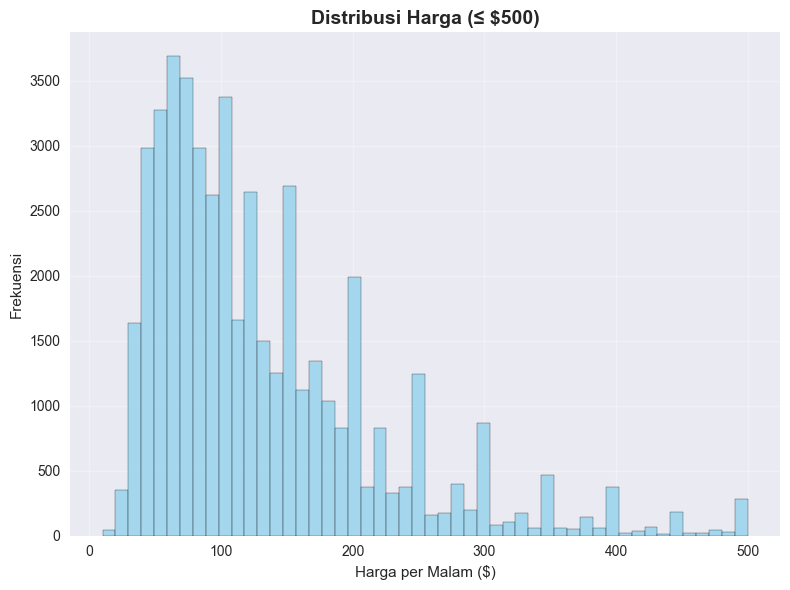

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df[df['price'] <= 500]['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga (≤ $500)', fontsize=14, fontweight='bold')
plt.xlabel('Harga per Malam ($)')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Menunjukkan bahwa sebagian besar harga listing berada di bawah $200, dan terdapat konsentrasi besar di harga rendah. Outlier dihilangkan untuk fokus pada persebaran umum.

### 2. Distribusi Harga per Borough

<Figure size 800x600 with 0 Axes>

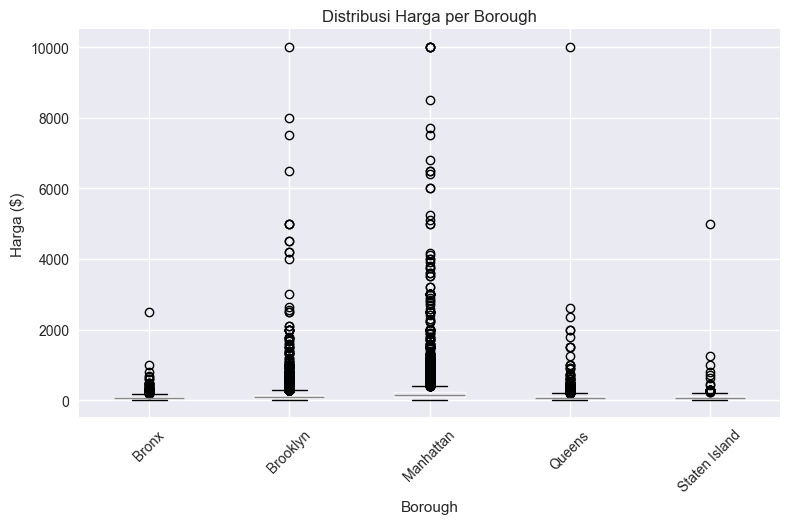

In [12]:
plt.figure(figsize=(8, 6))
df.boxplot(column='price', by='neighbourhood_group')
plt.title('Distribusi Harga per Borough')
plt.xlabel('Borough')
plt.ylabel('Harga ($)')
plt.xticks(rotation=45)
plt.suptitle('')
plt.tight_layout()
plt.show()

Menampilkan sebaran harga berdasarkan wilayah (borough). Terlihat bahwa Manhattan memiliki harga median tertinggi dan sebaran harga yang luas.

### 3. Distribusi Tipe Ruangan

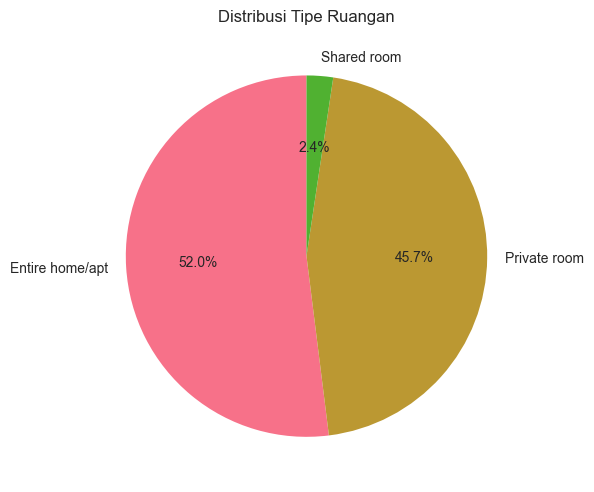

In [13]:
plt.figure(figsize=(6, 6))
room_counts = df['room_type'].value_counts()
plt.pie(room_counts.values, labels=room_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Tipe Ruangan')
plt.tight_layout()
plt.show()

Diagram pie yang menunjukkan bahwa mayoritas listing merupakan Entire Home/Apartment, diikuti oleh Private Room, dan Shared Room sangat sedikit.

### 4. Jumlah Listing per Borough

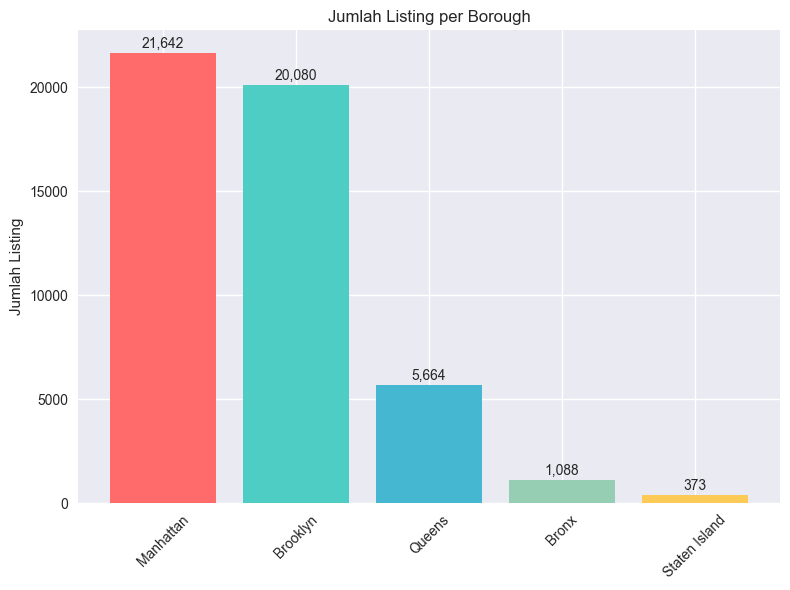

In [14]:
plt.figure(figsize=(8, 6))
borough_counts = df['neighbourhood_group'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
bars = plt.bar(borough_counts.index, borough_counts.values, color=colors)
plt.title('Jumlah Listing per Borough')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100, f'{int(height):,}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

Diagram batang yang menggambarkan bahwa Manhattan dan Brooklyn mendominasi jumlah listing, sementara Staten Island jauh lebih sedikit.

### 5. Harga vs Jumlah Reviews

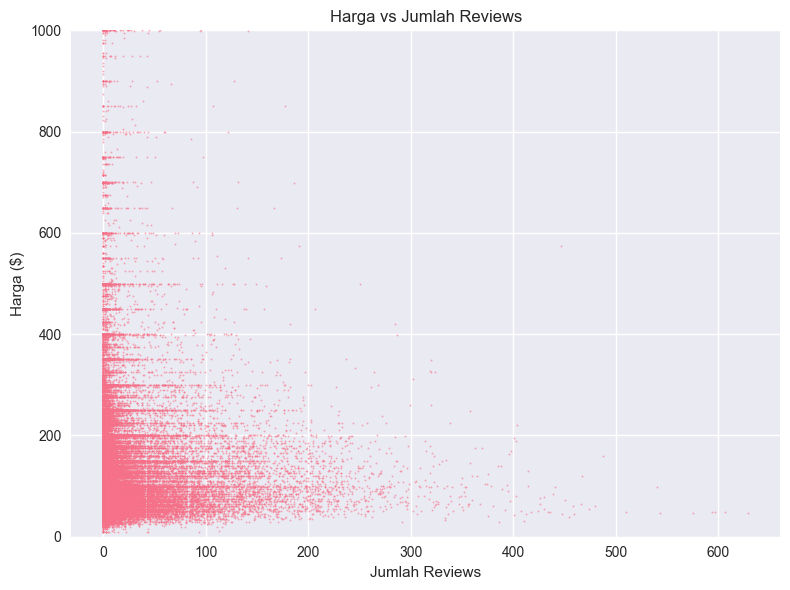

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5, s=1)
plt.xlabel('Jumlah Reviews')
plt.ylabel('Harga ($)')
plt.title('Harga vs Jumlah Reviews')
plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

Scatter plot memperlihatkan bahwa sebagian besar listing dengan banyak review berada di harga rendah-menengah. Listing dengan harga tinggi biasanya memiliki review yang lebih sedikit.

### 6. Distribusi Ketersediaan (365 hari)

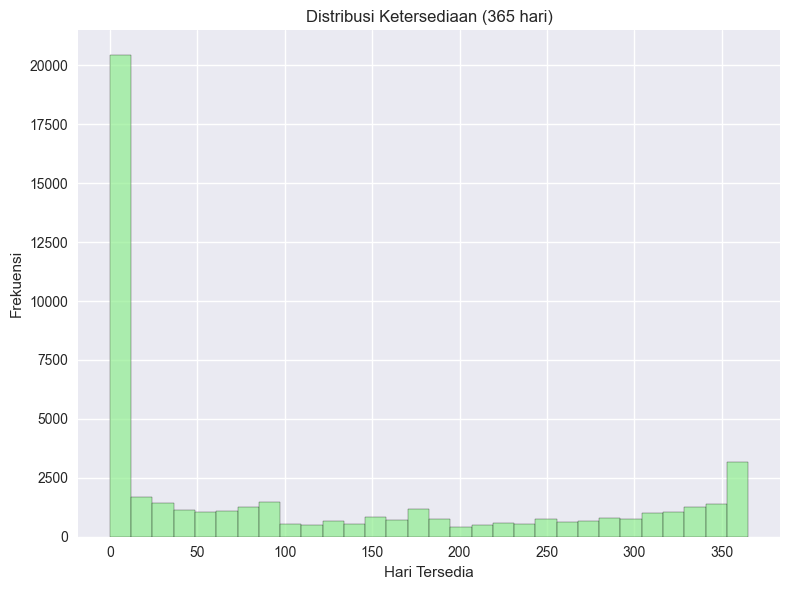

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['availability_365'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribusi Ketersediaan (365 hari)')
plt.xlabel('Hari Tersedia')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Menunjukkan sebagian besar listing tersedia sepanjang tahun, tetapi ada juga yang hanya tersedia di beberapa hari saja.

### 7. Top 10 Neighborhoods

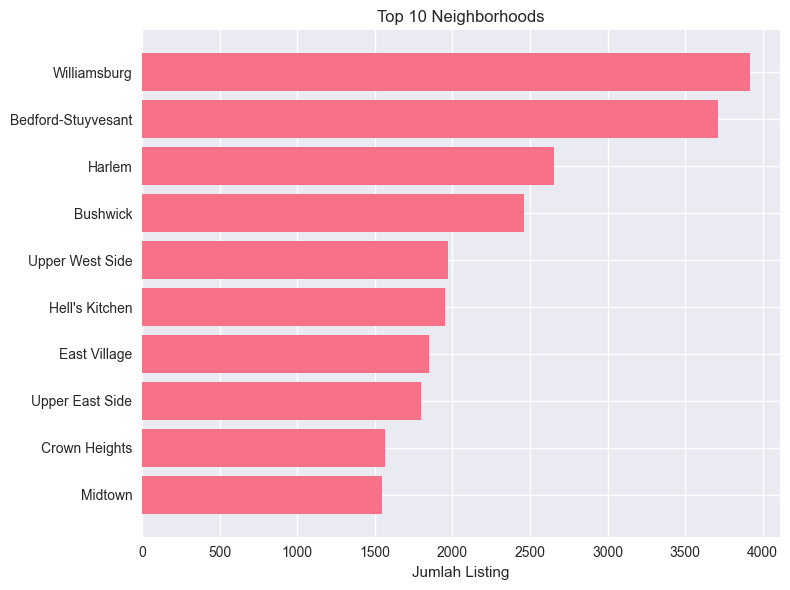

In [17]:
plt.figure(figsize=(8, 6))
top_10_neigh = df['neighbourhood'].value_counts().head(10)
plt.barh(range(len(top_10_neigh)), top_10_neigh.values)
plt.yticks(range(len(top_10_neigh)), top_10_neigh.index)
plt.xlabel('Jumlah Listing')
plt.title('Top 10 Neighborhoods')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Bar horizontal memperlihatkan 10 neighborhood dengan jumlah listing terbanyak. Ini memberi wawasan lokasi paling populer.

### 8. Distribusi Minimum Nights (≤ 30)

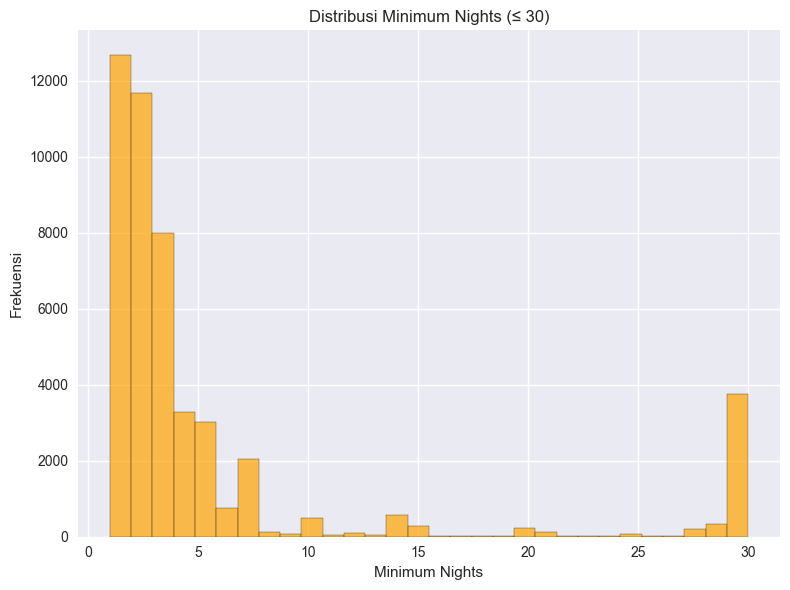

In [18]:
plt.figure(figsize=(8, 6))
min_nights_filtered = df[df['minimum_nights'] <= 30]['minimum_nights']
plt.hist(min_nights_filtered, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribusi Minimum Nights (≤ 30)')
plt.xlabel('Minimum Nights')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Menunjukkan bahwa sebagian besar listing memiliki minimum stay rendah, biasanya 1 hingga 5 malam.

### 9. Distribusi Jumlah Listing per Host (≤ 20)

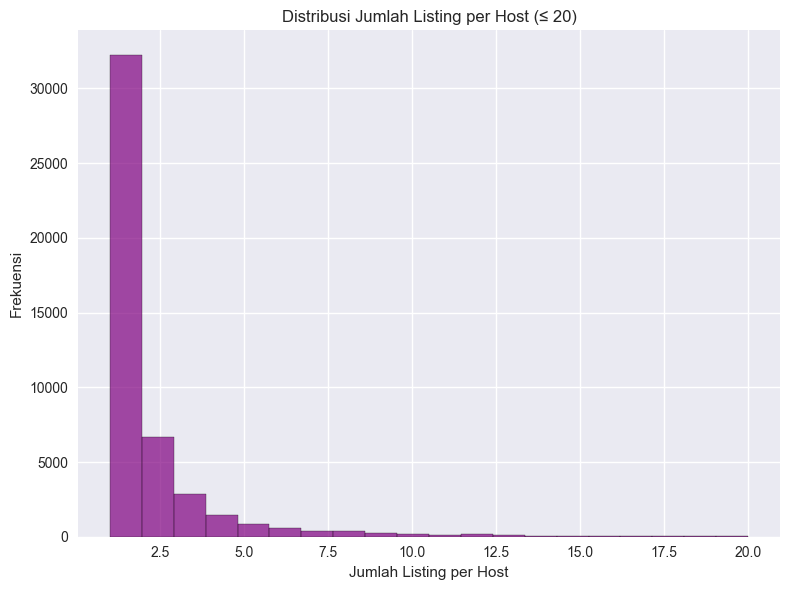

In [19]:
plt.figure(figsize=(8, 6))
host_count_filtered = df[df['calculated_host_listings_count'] <= 20]['calculated_host_listings_count']
plt.hist(host_count_filtered, bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribusi Jumlah Listing per Host (≤ 20)')
plt.xlabel('Jumlah Listing per Host')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Sebagian besar host hanya memiliki 1–2 listing, mengindikasikan banyak host individu, bukan bisnis besar.

### 10. Distribusi Reviews per Month (≤ 5)

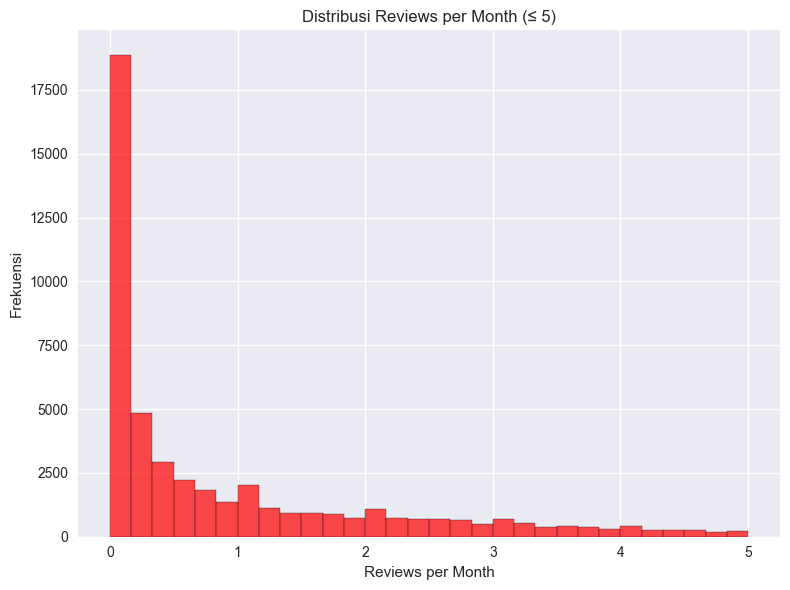

In [20]:
plt.figure(figsize=(8, 6))
reviews_per_month_filtered = df[df['reviews_per_month'] <= 5]['reviews_per_month']
plt.hist(reviews_per_month_filtered, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribusi Reviews per Month (≤ 5)')
plt.xlabel('Reviews per Month')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


Histogram yang memperlihatkan mayoritas listing memiliki review bulanan kurang dari 1, menandakan frekuensi sewa tidak terlalu tinggi.

### 11. Rata-rata dan Median Harga per Room Type

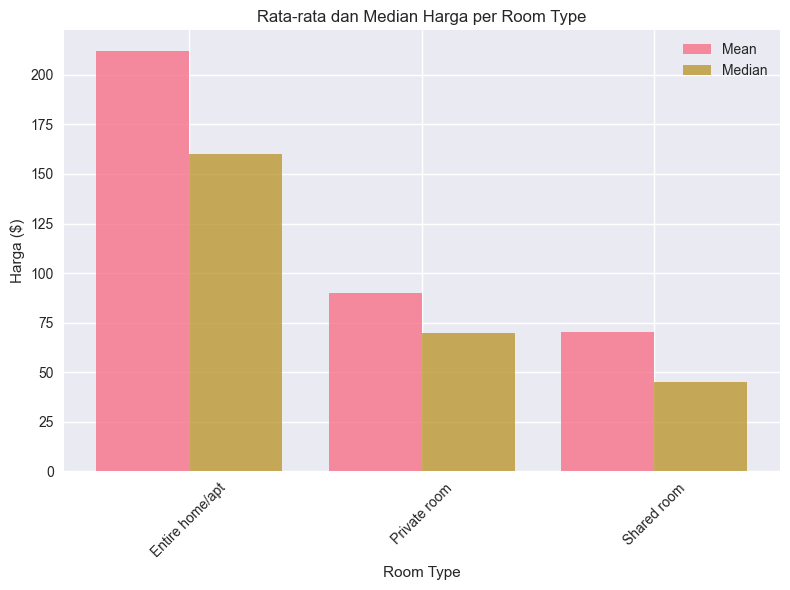

In [21]:
plt.figure(figsize=(8, 6))
room_price_stats = df.groupby('room_type')['price'].agg(['mean', 'median']).round(2)
x_pos = range(len(room_price_stats))
plt.bar([p - 0.2 for p in x_pos], room_price_stats['mean'], width=0.4, label='Mean', alpha=0.8)
plt.bar([p + 0.2 for p in x_pos], room_price_stats['median'], width=0.4, label='Median', alpha=0.8)
plt.xlabel('Room Type')
plt.ylabel('Harga ($)')
plt.title('Rata-rata dan Median Harga per Room Type')
plt.xticks(x_pos, room_price_stats.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Bar chart perbandingan mean dan median harga dari setiap tipe ruangan. Entire home/apartment memiliki harga paling tinggi, dan juga rentang harga yang luas.

### 12. Distribusi Geografis Listing (by Price)

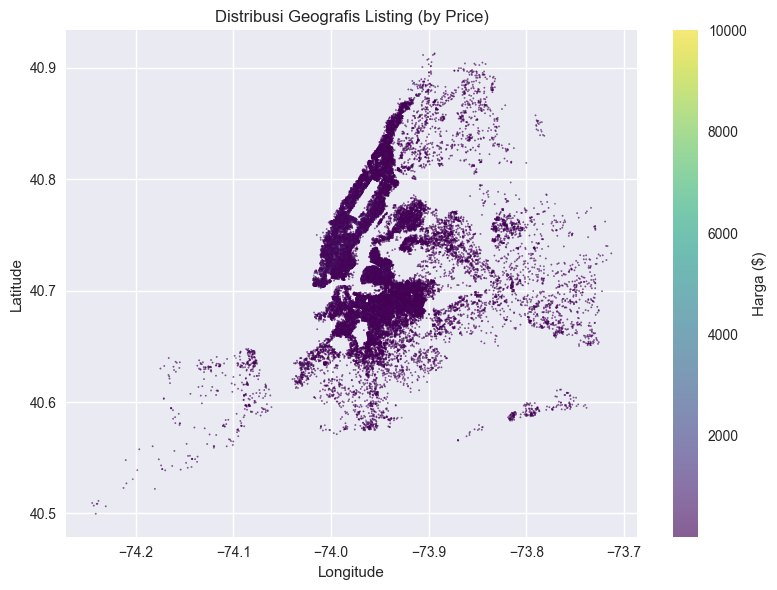

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='viridis', alpha=0.6, s=1)
plt.colorbar(label='Harga ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribusi Geografis Listing (by Price)')
plt.tight_layout()
plt.show()

Scatter plot berdasarkan koordinat longitude dan latitude. Warna menunjukkan harga, dengan intensitas tinggi di Manhattan dan sekitarnya.

## LANGKAH 7: ADVANCED ANALYSIS

🔬 ANALISIS LANJUTAN

📊 ANALISIS KORELASI:


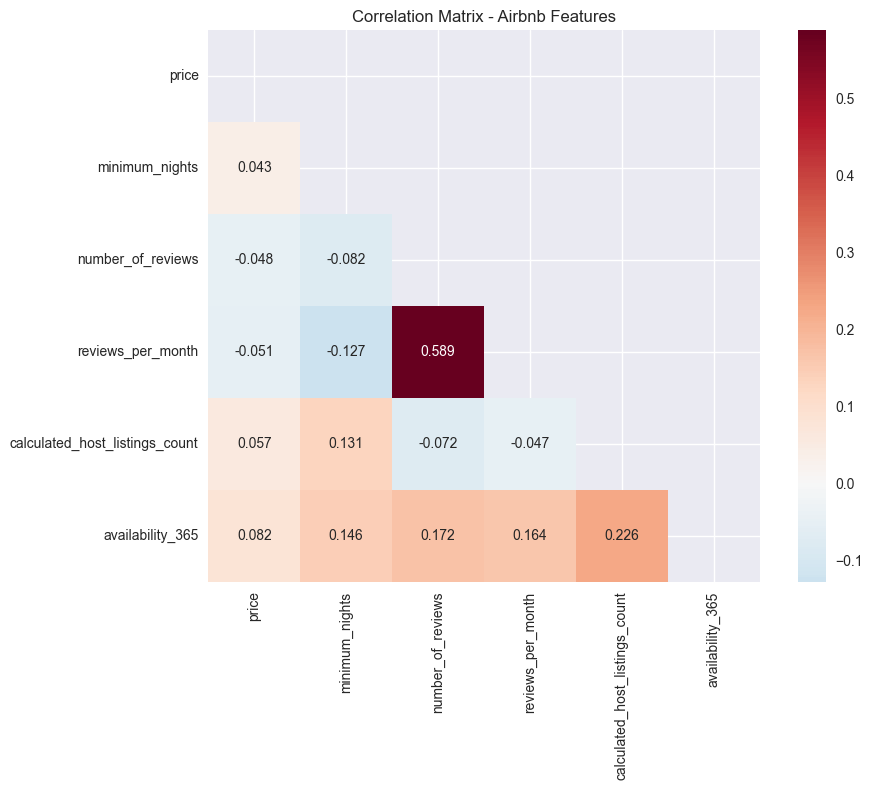


🔍 STATISTICAL INSIGHTS:

Harga per Borough:
                     count    mean  median     std
neighbourhood_group                               
Bronx                 1088   87.55    65.0  106.82
Brooklyn             20080  124.47    90.0  186.96
Manhattan            21642  196.91   150.0  291.49
Queens                5664   99.54    75.0  167.13
Staten Island          373  114.81    75.0  277.62

Analisis per Room Type:
                 price                number_of_reviews availability_365
                 count    mean median              mean             mean
room_type                                                               
Entire home/apt  25391  211.82  160.0             22.84           111.92
Private room     22299   89.82   70.0             24.11           111.26
Shared room       1157   70.20   45.0             16.64           161.70

👥 HOST ANALYSIS:
Total unique hosts: 37,423
Average listings per host: 7.15
Super hosts (≥10 listings): 115
Percentage of total listin

In [55]:
print("🔬 ANALISIS LANJUTAN")

# Correlation Analysis
print("\n📊 ANALISIS KORELASI:")
correlation_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f')
plt.title('Correlation Matrix - Airbnb Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical Insights
print("\n🔍 STATISTICAL INSIGHTS:")

# Price analysis by borough
price_by_borough = df.groupby('neighbourhood_group')['price'].agg(['count', 'mean', 'median', 'std']).round(2)
print("\nHarga per Borough:")
print(price_by_borough)

# Room type analysis
room_analysis = df.groupby('room_type').agg({
    'price': ['count', 'mean', 'median'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean'
}).round(2)
print("\nAnalisis per Room Type:")
print(room_analysis)

# Host analysis
print("\n👥 HOST ANALYSIS:")
print(f"Total unique hosts: {df['host_id'].nunique():,}")
print(f"Average listings per host: {df['calculated_host_listings_count'].mean():.2f}")

# Super hosts (hosts with many listings)
super_hosts = df[df['calculated_host_listings_count'] >= 10]
print(f"Super hosts (≥10 listings): {super_hosts['host_id'].nunique():,}")
print(f"Percentage of total listings from super hosts: {len(super_hosts)/len(df)*100:.2f}%")

print("=" * 50)

## LANGKAH 8: BUSINESS INSIGHTS & RECOMMENDATIONS

In [54]:
print("💼 BUSINESS INSIGHTS & RECOMMENDATIONS")

print("\n🎯 KEY FINDINGS:")
print("1. PRICE INSIGHTS:")
print(f"   - Average price: ${df['price'].mean():.2f}")
print(f"   - Median price: ${df['price'].median():.2f}")
print(f"   - Price range: ${df['price'].min():.0f} - ${df['price'].max():.0f}")
print(f"   - Most expensive borough: {price_by_borough['mean'].idxmax()}")
print(f"   - Most affordable borough: {price_by_borough['mean'].idxmin()}")

print("\n2. MARKET CONCENTRATION:")
most_listings_borough = df['neighbourhood_group'].value_counts().index[0]
most_listings_count = df['neighbourhood_group'].value_counts().iloc[0]
total_listings = len(df)
print(f"   - {most_listings_borough} dominates with {most_listings_count:,} listings ({most_listings_count/total_listings*100:.1f}%)")

print("\n3. PROPERTY TYPES:")
most_common_room = df['room_type'].value_counts().index[0]
print(f"   - Most common: {most_common_room}")
print(f"   - Distribution: {dict(df['room_type'].value_counts())}")

print("\n4. REVIEW PATTERNS:")
no_reviews = (df['number_of_reviews'] == 0).sum()
print(f"   - Listings with no reviews: {no_reviews:,} ({no_reviews/len(df)*100:.1f}%)")
print(f"   - Average reviews per listing: {df['number_of_reviews'].mean():.2f}")

print("\n5. AVAILABILITY:")
always_available = (df['availability_365'] == 365).sum()
never_available = (df['availability_365'] == 0).sum()
print(f"   - Always available (365 days): {always_available:,} ({always_available/len(df)*100:.1f}%)")
print(f"   - Never available (0 days): {never_available:,} ({never_available/len(df)*100:.1f}%)")

print("\n💡 RECOMMENDATIONS:")
print("1. UNTUK HOSTS BARU:")
print("   - Focus pada Manhattan dan Brooklyn untuk demand tinggi")
print("   - Pertimbangkan 'Entire home/apt' untuk revenue maksimal")
print("   - Set competitive pricing berdasarkan location dan room type")

print("\n2. UNTUK PRICING STRATEGY:")
print("   - Manhattan: Premium pricing strategy")
print("   - Brooklyn: Value-for-money positioning") 
print("   - Seasonal adjustment berdasarkan availability patterns")

print("\n3. UNTUK MARKET ANALYSIS:")
print("   - Monitor super hosts untuk competitive intelligence")
print("   - Focus pada properties dengan review patterns yang baik")
print("   - Optimize availability untuk maximize occupancy")

print("\n" + "=" * 50)
print("✅ ANALISIS AIRBNB DATA COMPLETED!")
print("📊 Total visualizations created: 13 charts")
print("📈 Key metrics analyzed: Price, Location, Reviews, Availability")
print("💾 Files saved: airbnb_analysis_comprehensive.png, correlation_matrix.png")
print("=" * 50)

💼 BUSINESS INSIGHTS & RECOMMENDATIONS

🎯 KEY FINDINGS:
1. PRICE INSIGHTS:
   - Average price: $152.77
   - Median price: $106.00
   - Price range: $10 - $10000


NameError: name 'price_by_borough' is not defined